In [1]:
#Import Libraries
import warnings
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
warnings.filterwarnings("ignore")
from statsmodels.compat import lzip
import statsmodels.formula.api as sm
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.api import add_constant
import statsmodels.graphics.regressionplots
from scipy.stats import norm, skew,kurtosis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
pd.set_option('display.float_format', lambda x: '%.4f' % x)

#Load data
seo = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical.xlsx", sheet_name = "SEO")
direct = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical.xlsx", sheet_name = "Direct")
email = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical.xlsx", sheet_name = "Email")
sem = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical.xlsx", sheet_name = "SEM")
pla = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical.xlsx", sheet_name = "PLA")
affiliate = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical.xlsx", sheet_name = "Affiliate")
vertical = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical.xlsx", sheet_name = "PD Vertical")
display = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical.xlsx", sheet_name = "Display")
other = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical.xlsx", sheet_name = "Other")

seo1 = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical_2018.xlsx", sheet_name = "SEO")
direct1 = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical_2018.xlsx", sheet_name = "Direct")
email1 = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical_2018.xlsx", sheet_name = "Email")
sem1 = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical_2018.xlsx", sheet_name = "SEM")
pla1 = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical_2018.xlsx", sheet_name = "PLA")
affiliate1 = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical_2018.xlsx", sheet_name = "Affiliate")
vertical1 = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical_2018.xlsx", sheet_name = "PD Vertical")
display1 = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical_2018.xlsx", sheet_name = "Display")
other1 = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical_2018.xlsx", sheet_name = "Other")

seo2 = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical_2019.xlsx", sheet_name = "SEO")
direct2 = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical_2019.xlsx", sheet_name = "Direct")
email2 = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical_2019.xlsx", sheet_name = "Email")
sem2 = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical_2019.xlsx", sheet_name = "SEM")
pla2 = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical_2019.xlsx", sheet_name = "PLA")
affiliate2 = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical_2019.xlsx", sheet_name = "Affiliate")
vertical2 = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical_2019.xlsx", sheet_name = "PD Vertical")
display2 = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical_2019.xlsx", sheet_name = "Display")
other2 = pd.read_excel("Monthly_Visit_Orders_Revenue_Conversion_Historical_2019.xlsx", sheet_name = "Other")

sem_daily = pd.read_excel("Daily_Visit_Orders_Conversion_June_2019.xlsx", sheet_name = "SEM")
sem_weekends = pd.read_excel("Daily_Visit_Orders_Conversion_June_2019.xlsx", sheet_name = "SEM Weekends")
sem_weekdays = pd.read_excel("Daily_Visit_Orders_Conversion_June_2019.xlsx", sheet_name = "Weekdays")

#Combine to form a single table for Paid Channels - 2019
frames = [sem2,pla2,affiliate2,display2]
data = pd.concat(frames)
df = pd.DataFrame(data)

sem2['logAdRatio'] = np.log(sem2['AdRatio'])
df_sem2 = sem2[['Revenue', 'Conversion','AdRatio','logAdRatio','Spend']]
#sem_log = np.log(df_sem)
reg_result_sem2_logAdRatio = sm.ols(formula = 'Spend ~ logAdRatio',data = df_sem2).fit()

spend_adratio = pd.read_html(reg_result_sem2_logAdRatio.summary().tables[1].as_html(),header=0,index_col=0)[0]
adratio_intercept=spend_adratio['coef'].values[0]
adratio_coef=spend_adratio['coef'].values[1] #coefficient

#calculate spend (SEM-2019 data) at points 20 to 40 margin (Ad Ratio)
spend_40percent = (adratio_coef*np.log(40))+(adratio_intercept)
spend_35percent = (adratio_coef*np.log(35))+(adratio_intercept)
spend_30percent = (adratio_coef*np.log(30))+(adratio_intercept)
spend_25percent = (adratio_coef*np.log(25))+(adratio_intercept)
spend_22percent = (adratio_coef*np.log(22))+(adratio_intercept)

revenue_40percent = spend_40percent/0.4
revenue_35percent = spend_35percent/0.35
revenue_30percent = spend_30percent/0.3
revenue_25percent = spend_25percent/0.25
revenue_22percent = spend_22percent/0.22

sem2_visists_spend = sem2[['Visits', 'Orders', 'Revenue', 'Conversion', 'Spend', 'AOV', 'AdRatio']]
#sem2_log = np.log(sem2_visists_spend)
reg_result_sem2_visists_spend = sm.ols(formula = 'Visits ~ Spend',data = sem2_visists_spend).fit()

visits_Spend = pd.read_html(reg_result_sem2_visists_spend.summary().tables[1].as_html(),header=0,index_col=0)[0]
spend_intercept=visits_Spend['coef'].values[0]
spend_coef=visits_Spend['coef'].values[1]

visits_40percent=(spend_intercept)+(spend_coef*spend_40percent)
visits_35percent=(spend_intercept)+(spend_coef*spend_35percent)
visits_30percent=(spend_intercept)+(spend_coef*spend_30percent)
visits_25percent=(spend_intercept)+(spend_coef*spend_25percent)
visits_22percent=(spend_intercept)+(spend_coef*spend_22percent)

orders_sem2 = sem2[['Visits', 'Orders', 'Revenue', 'Conversion', 'Spend', 'AOV', 'AdRatio']]
sem_log_orders = np.log(orders_sem2)
reg_result_orders_sem2 = sm.ols(formula = 'Orders ~ Visits',data = orders_sem2).fit()

ordersV = pd.read_html(reg_result_orders_sem2.summary().tables[1].as_html(),header=0,index_col=0)[0]
visits_intercept=ordersV['coef'].values[0]
visits_coef=ordersV['coef'].values[1]

orders_40percent=(visits_intercept)+(visits_coef*visits_40percent)
orders_35percent=(visits_intercept)+(visits_coef*visits_35percent)
orders_30percent=(visits_intercept)+(visits_coef*visits_30percent)
orders_25percent=(visits_intercept)+(visits_coef*visits_25percent)
orders_22percent=(visits_intercept)+(visits_coef*visits_22percent)

#Affiliate Paid Channel
affiliate2['AdRatio'] = affiliate2['AdRatio'].replace(0,0.00001)
affiliate2['logAdRatio'] = np.log(affiliate2['AdRatio'])
df_affiliate2 = affiliate2[['Revenue', 'Conversion','AdRatio','logAdRatio','Spend','AOV','Visits']]
#affiliate_log = np.log(df_affiliate2)
reg_result_affiliate2 = sm.ols(formula = 'Spend ~ logAdRatio',data = df_affiliate2).fit()

aff_spend_adratio = pd.read_html(reg_result_affiliate2.summary().tables[1].as_html(),header=0,index_col=0)[0]
aff_adratio_intercept=aff_spend_adratio['coef'].values[0]
aff_adratio_coef=aff_spend_adratio['coef'].values[1] #coefficient

#calculate spend (Affiliate-2019 data) at points 10 to 25 margin (Ad Ratio)
aff_spend_25percent = (aff_adratio_coef*np.log(25))+(aff_adratio_intercept)
aff_spend_22percent = (aff_adratio_coef*np.log(22))+(aff_adratio_intercept)
aff_spend_20percent = (aff_adratio_coef*np.log(20))+(aff_adratio_intercept)
aff_spend_15percent = (aff_adratio_coef*np.log(15))+(aff_adratio_intercept)
aff_spend_10percent = (aff_adratio_coef*np.log(10))+(aff_adratio_intercept)

aff_revenue_25percent = aff_spend_25percent/0.25
aff_revenue_22percent = aff_spend_22percent/0.22
aff_revenue_20percent = aff_spend_20percent/0.20
aff_revenue_15percent = aff_spend_15percent/0.15
aff_revenue_10percent = aff_spend_10percent/0.10

affiliate2['Spend'] = affiliate2['Spend'].replace(0,0.00001)
affiliate2_visists_spend = affiliate2[['Visits', 'Orders', 'Revenue', 'Conversion', 'Spend', 'AOV', 'AdRatio']]
affiliate2_log = np.log(affiliate2_visists_spend)
reg_result_affiliate2_visists_spend = sm.ols(formula = 'Visits ~ Spend',data = affiliate2_visists_spend).fit()

aff_visits_spend = pd.read_html(reg_result_affiliate2_visists_spend.summary().tables[1].as_html(),header=0,index_col=0)[0]
aff_spend_intercept=aff_visits_spend['coef'].values[0]
aff_spend_coef=aff_visits_spend['coef'].values[1] #coefficient

aff_visits_25percent=(aff_spend_intercept)+(aff_spend_coef*aff_spend_25percent)
aff_visits_22percent=(aff_spend_intercept)+(aff_spend_coef*aff_spend_22percent)
aff_visits_20percent=(aff_spend_intercept)+(aff_spend_coef*aff_spend_20percent)
aff_visits_15percent=(aff_spend_intercept)+(aff_spend_coef*aff_spend_15percent)
aff_visits_10percent=(aff_spend_intercept)+(aff_spend_coef*aff_spend_10percent)

orders_affiliate2 = affiliate2[['Visits', 'Orders', 'Revenue', 'Conversion', 'Spend', 'AOV', 'AdRatio']]
affiliate2_log_orders = np.log(orders_affiliate2)
reg_result_orders_affiliate2 = sm.ols(formula = 'Orders ~ Visits',data = orders_affiliate2).fit()

aff_ordersV = pd.read_html(reg_result_orders_affiliate2.summary().tables[1].as_html(),header=0,index_col=0)[0]
aff_visits_intercept=aff_ordersV['coef'].values[0]
aff_visits_coef=aff_ordersV['coef'].values[1] #coefficient

aff_orders_25percent=(aff_visits_intercept)+(aff_visits_coef*aff_visits_25percent)
aff_orders_22percent=(aff_visits_intercept)+(aff_visits_coef*aff_visits_22percent)
aff_orders_20percent=(aff_visits_intercept)+(aff_visits_coef*aff_visits_20percent)
aff_orders_15percent=(aff_visits_intercept)+(aff_visits_coef*aff_visits_15percent)
aff_orders_10percent=(aff_visits_intercept)+(aff_visits_coef*aff_visits_10percent)

#Create dataframe
dframe_sem2 = {'Paid Channel': ['SEM','SEM','SEM','SEM','SEM'],
               'Visits': [visits_22percent,visits_25percent,visits_30percent,visits_35percent,visits_40percent],
               'Orders': [orders_22percent,orders_25percent,orders_30percent,orders_35percent,orders_40percent],
               'Spend': [spend_22percent,spend_25percent,spend_30percent,spend_35percent,spend_40percent],
               'Revenue': [revenue_22percent,revenue_25percent,revenue_30percent,revenue_35percent,revenue_40percent],
               'Ad Ratio': ['22%','25%','30%','35%','40%']}
dframe_sem2 = pd.DataFrame(data=dframe_sem2)

dframe_affiliate2 = {'Paid Channel': ['Affiliate','Affiliate','Affiliate','Affiliate','Affiliate'],
                     'Visits': [aff_visits_10percent,aff_visits_15percent,aff_visits_20percent,
                                aff_visits_22percent,aff_visits_25percent],
                     'Orders': [aff_orders_10percent,aff_orders_15percent,aff_orders_20percent,
                                aff_orders_22percent,aff_orders_25percent],
                     'Spend': [aff_spend_10percent,aff_spend_15percent,aff_spend_20percent,
                               aff_spend_22percent,aff_spend_25percent],
                     'Revenue': [aff_revenue_10percent,aff_revenue_15percent,aff_revenue_20percent,
                                 aff_revenue_22percent,aff_revenue_25percent],
                     'Ad Ratio': ['10%','15%','20%','22%','25%']}
dframe_affiliate2 = pd.DataFrame(data=dframe_affiliate2)

#Combine to form a single table for SEM$Affiliate Paid Channels - 2019
frames = [dframe_sem2,dframe_affiliate2]
df_combined = pd.concat(frames)
df = pd.DataFrame(df_combined )
df['Spend'] = df['Spend'].map('${:,.2f}'.format)
df['Revenue'] = df['Revenue'].map('${:,.2f}'.format)
df['Visits'] = df['Visits'].map('{:,.0f}'.format)
df['Orders'] = df['Orders'].map('{:,.0f}'.format)
#df[['Visits','Orders']] = df[['Visits','Orders']].apply(lambda x: pd.Series.round(x, 0))
#df[['Visits','Orders']] = df[['Visits','Orders']].apply(lambda x : "{:,}".format(x))
#df[['Visits','Orders']] = df[['Visits','Orders']].apply(lambda x: pd.Series.round(x, 0)).astype(int)
#df.sort_values(by=['Paid Channel', 'Ad Ratio'], inplace=True, ascending=True)
#df.to_excel("output.xlsx", index=False)
#df.head().style.format({"Visits": "{:,.0f}", "Orders": "{:,.0f}"})
pd.options.display.float_format = '{:,.0f}'.format

#View few results
df.head(10)

,Paid Channel,Visits,Orders,Spend,Revenue,Ad Ratio
0,SEM,"211,532","4,244","$47,991.84","$218,144.74",22%
1,SEM,"295,382","6,441","$127,312.45","$509,249.80",25%
2,SEM,"414,972","9,574","$240,442.98","$801,476.58",30%
3,SEM,"516,084","12,224","$336,093.47","$960,267.06",35%
4,SEM,"603,672","14,518","$418,949.70","$1,047,374.25",40%
0,Affiliate,"19,928","2,733","$15,192.06","$151,920.65",10%
1,Affiliate,"20,364","2,784","$15,639.70","$104,264.67",15%
2,Affiliate,"20,674","2,820","$15,957.30","$79,786.51",20%
3,Affiliate,"20,777","2,832","$16,062.53","$73,011.48",22%
4,Affiliate,"20,914","2,848","$16,203.65","$64,814.62",25%


In [63]:
df.to_excel("output.xlsx", index=False)

In [35]:
#writer = pd.ExcelWriter('output.xlsx')
#df.to_excel(writer,'Sheet1')
#writer.save()

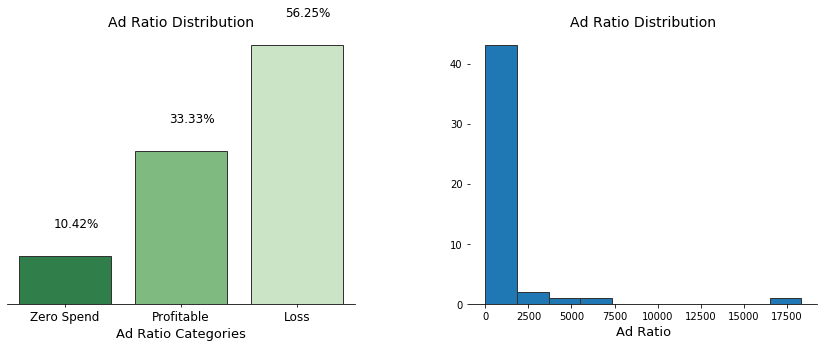

In [6]:
cut_points = [-1,0,40,19350.48]
label_names = ["Zero Spend", "Profitable","Loss"]
df["Flag_AdRatio"] = pd.cut(df["AdRatio"],cut_points,labels=label_names)

f,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Flag_AdRatio',data=df,palette='Greens_r',orient='v',ax=ax1,edgecolor='0.2')
for i in ax1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax1.text(i.get_x()+0.3, i.get_height()+3, \
            str(round((i.get_height()/df.Flag_AdRatio.shape[0])*100,2))+'%', fontsize=12,
                color='black') 
ax2.hist('AdRatio', bins=10,data=df,edgecolor='0.2')
ax1.set_xlabel("Ad Ratio Categories", fontsize=13)
ax1.tick_params(length=3,labelsize=12,labelcolor='black')
ax1.set_title("Ad Ratio Distribution", fontsize=14)
ax2.set_xlabel('Ad Ratio',fontsize=13)
ax2.set_title('Ad Ratio Distribution',fontsize=14)
x_axis = ax1.axes.get_yaxis().set_visible(False)

f.subplots_adjust(wspace=0.33,right=1.25)
sns.despine(left=True)
plt.show()

In [18]:
df.to_csv('sample.csv')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


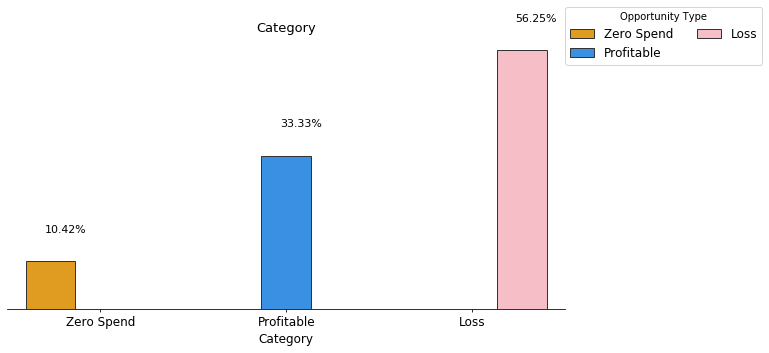

In [8]:
def gender_dist_plot(x_val,title):
    f,ax = plt.subplots(figsize=(10,5))
    sns.countplot(x=x_val, data=df, palette=['orange','dodgerblue','lightpink'],
                  hue='Flag_AdRatio',hue_order=['Zero Spend','Profitable','Loss'],
                  orient='v',ax=ax,edgecolor='0.2')
    for i in ax.patches:
        ax.text(i.get_x()+0.1, i.get_height()+3, \
                str(round((i.get_height()/df.Channel.shape[0])*100,2))+'%', fontsize=11,
                    color='black') 
    ax.set_xlabel(title, fontsize=12,color='black')
    ax.tick_params(length=3,labelsize=12,labelcolor='black')
    ax.set_title(title +'', fontsize=13)
    x_axis = ax.axes.get_yaxis().set_visible(False)
    ax.legend(loc=[1,0.9],fontsize=12,title='Opportunity Type',ncol=2)
    sns.despine(left=True)
    return plt.show()

gender_dist_plot('Flag_AdRatio','Category')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


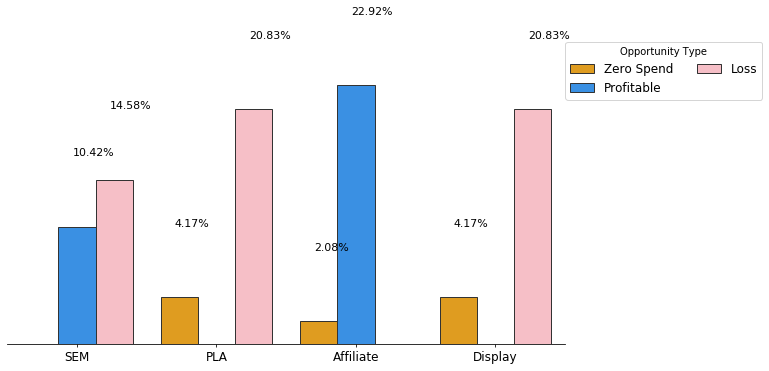

In [9]:
gender_dist_plot('Channel','')

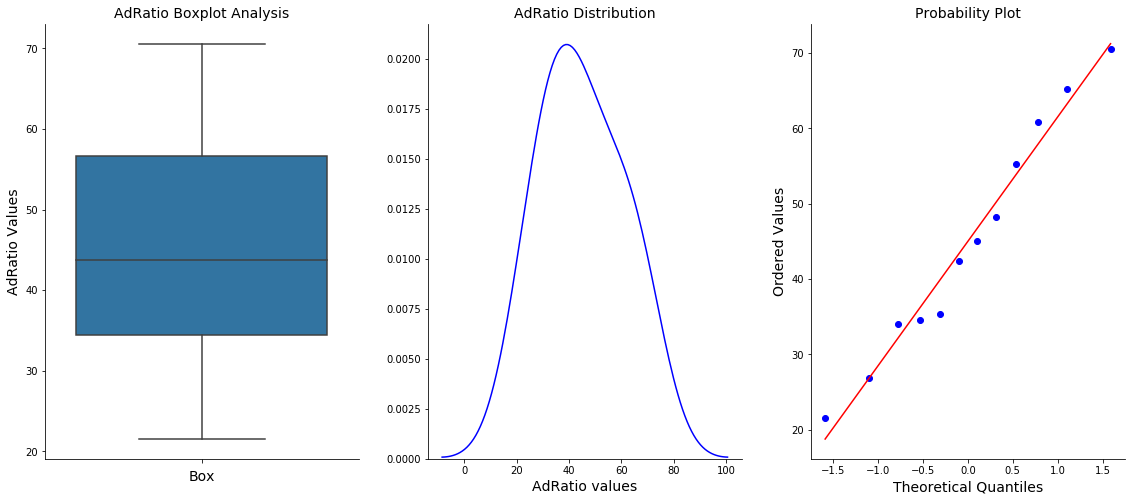

In [30]:
def data_transform(data,input):
    f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(8,8))
    #plots
    sns.boxplot(x=input, data = data,ax=ax1,orient='v')
    sns.distplot(data[input],ax=ax2,color='blue',hist=False)
    res = stats.probplot(data[input], plot=ax3)

    axes = [ax1,ax2]
    kwargs = {'fontsize':14,'color':'black'}
    #for i in range(len(axes)):
        #x_axis = axes[i].axes.get_yaxis().set_visible(False)
    ax1.set_title(input+' Boxplot Analysis',**kwargs)
    ax1.set_xlabel('Box',**kwargs)
    ax1.set_ylabel('AdRatio Values',**kwargs)

    ax2.set_title(input+' Distribution',**kwargs)
    ax2.set_xlabel(input+' values',**kwargs)

    ax3.set_title('Probability Plot',**kwargs)
    ax3.set_xlabel('Theoretical Quantiles',**kwargs)
    ax3.set_ylabel('Ordered Values',**kwargs)

    f.subplots_adjust(wspace=0.22,right= 2)
    sns.despine()
    return plt.show()

data_transform(sem2,'AdRatio')

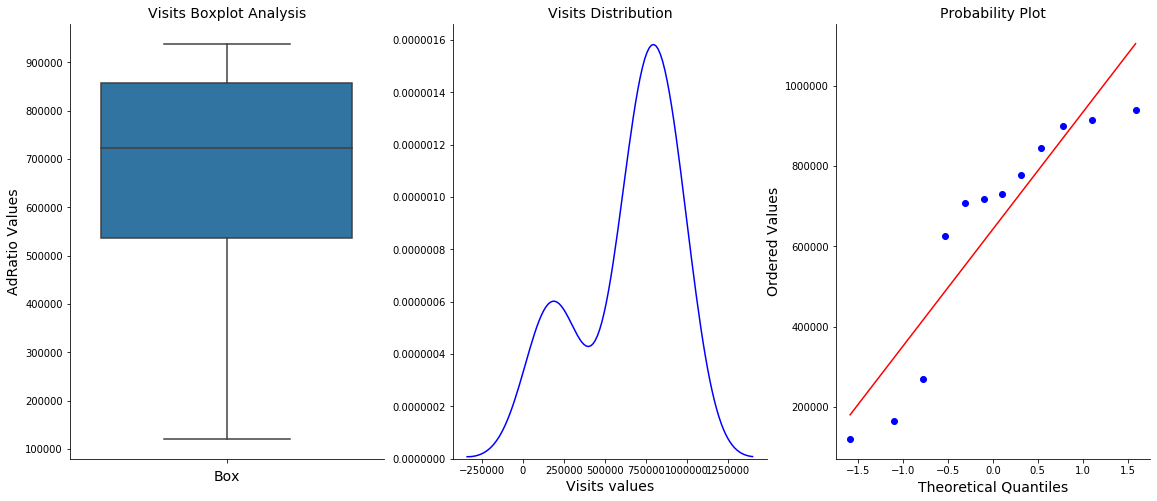

In [31]:
data_transform(sem2,'Visits')

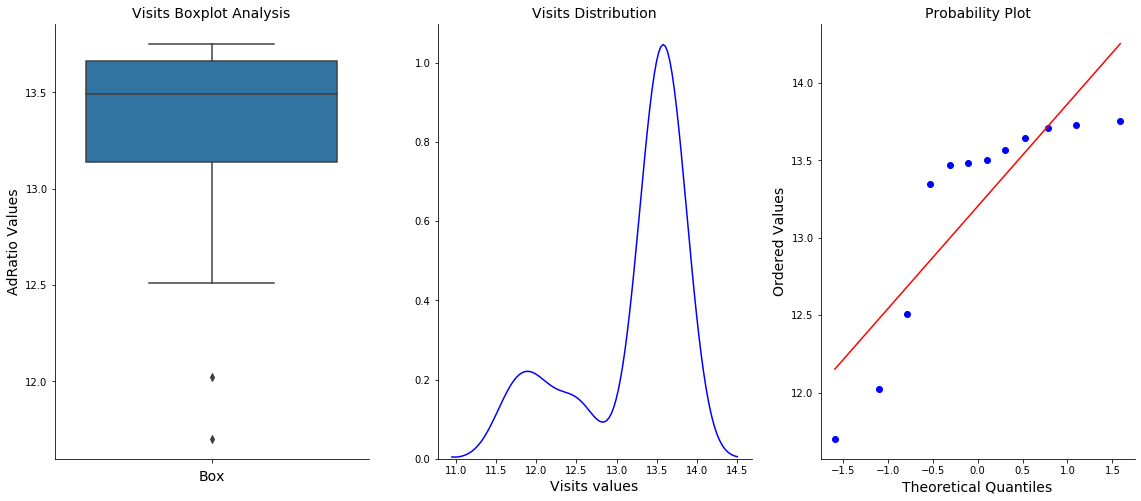

In [36]:
sem2.Visits = np.log1p(sem2.Visits)
data_transform(sem2,'Visits')

In [10]:
sem2.columns

Index(['Date', 'MonthNumber', 'Channel', 'Visits', 'Orders', 'Conversion',
       'Revenue', 'Spend', 'AOV', 'AdRatio'],
      dtype='object')

In [58]:
#p_value Analysis correlation
p_value_sem2=sem2[['Visits','Orders','Spend','Revenue','AdRatio', 'AOV','Conversion']]
p_value = [round(pearsonr(p_value_sem2['Visits'],p_value_sem2[i])[1],4) for i in p_value_sem2.columns]
pvalue_table = pd.DataFrame(p_value,p_value_sem2.columns).reset_index()
pvalue_table.columns=['colmuns_name','p_value']
pvalue_table.sort_values('p_value')

,colmuns_name,p_value
0,Visits,0.0000
1,Orders,0.0000
2,Spend,0.0000
3,Revenue,0.0000
5,AOV,0.0012
4,AdRatio,0.0113
6,Conversion,0.0206


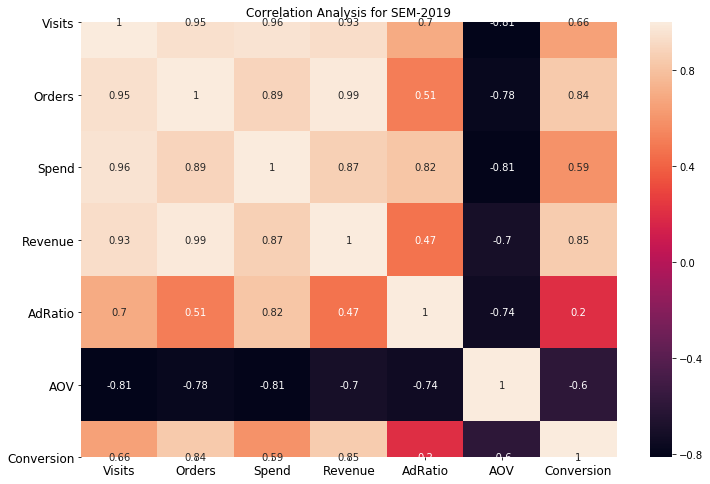

In [59]:
plt.figure(figsize=(12,8))
kwargs = {'fontsize':12,'color':'black'}
sns.heatmap(p_value_sem2.corr(),annot=True,robust=True)
plt.title('Correlation Analysis for SEM-2019',**kwargs)
plt.tick_params(length=3,labelsize=12,color='black')
plt.yticks(rotation=0)
plt.show()

In [ ]:
##########Model step#############

In [50]:
df = sem2[['AdRatio', 'Visits','Conversion']]
X = df.drop('Visits',axis=1)
y = df['Visits']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
#Standardizing the values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
## Build  & Evaluate our Model
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('intercept: {:.4f} \ncte1: {:.4f} \ncte2: {:.4f}'.format(model.intercept_,model.coef_[0],model.coef_[1]))

print('Model_Accuracy_Score (R Square): {:.4f} \nLoss(RMSE): {:.4f}'.format(r2_score(y_pred,y_test),np.sqrt(mean_squared_error(y_pred,y_test))))

intercept: 658234.4444 
cte1: 183710.3775 
cte2: 163674.4815
Model_Accuracy_Score (R Square): 0.7395 
Loss(RMSE): 254447.2358


In [11]:
df_revenue = sem2[['Revenue', 'AdRatio', 'Conversion', 'Visits']]
X = df_revenue.drop('Revenue',axis=1)
y = df_revenue['Revenue']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
#Standardizing the values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
## Build  & Evaluate our Model
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('intercept: {:.4f} \ncte1: {:.4f} \ncte2: {:.4f}'.format(model.intercept_,model.coef_[0],model.coef_[1]))

print('Model_Accuracy_Score (R Square): {:.4f} \nLoss(RMSE): {:.4f}'.format(r2_score(y_pred,y_test),np.sqrt(mean_squared_error(y_pred,y_test))))

intercept: 1067229.8544 
cte1: -49814.1180 
cte2: 142534.7821
Model_Accuracy_Score (R Square): 0.9531 
Loss(RMSE): 121262.9825


In [3]:
(-49814.1180 *0.40)+1067229.8544

1047304.2072000001

In [13]:
spend1_40percentAdRatio=(1047304.2072444444*0.40)
spend1_40percentAdRatio

418921.68289777776

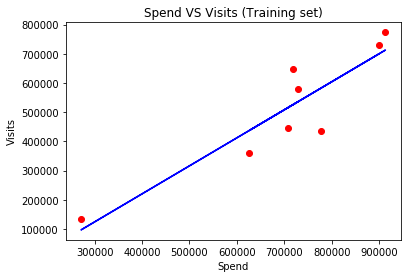

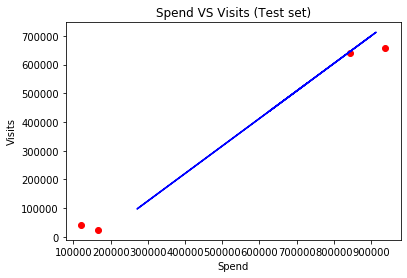

In [33]:
dfsem2 = sem2[['Visits', 'Spend']]
X = dfsem2.iloc[:, :-1]
y = dfsem2.iloc[:, 1]

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)


# Visualizing the Training set results
viz_train = plt
viz_train.scatter(X_train, y_train, color='red')
viz_train.plot(X_train, regressor.predict(X_train), color='blue')
viz_train.title('Spend VS Visits (Training set)')
viz_train.xlabel('Spend')
viz_train.ylabel('Visits')
viz_train.show()

# Visualizing the Test set results
viz_test = plt
viz_test.scatter(X_test, y_test, color='red')
viz_test.plot(X_train, regressor.predict(X_train), color='blue')
viz_test.title('Spend VS Visits (Test set)')
viz_test.xlabel('Spend')
viz_test.ylabel('Visits')
viz_test.show()

In [34]:
accuracy_lr = regressor.score(X_test, y_test)
print(accuracy_lr)

0.9616855689339705


In [35]:
y_pred = regressor.predict([[425980.24]])
y_pred

array([245522.63181337])

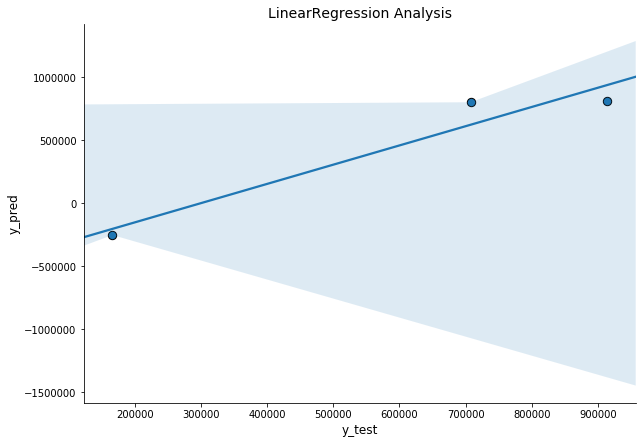

In [51]:
def model_scatter_plot(model):
    title = str(model)
    title = title.split('.')[3]
    title = title.replace("'>",'')
    lreg = model()
    lreg.fit(X_train,y_train)
    y_pred = lreg.predict(X_test)
    #model_table
    model_table = pd.DataFrame(y_pred,y_test).reset_index()
    model_table.columns=['y_test','y_pred']
    #Model Graph
    sns.lmplot(x = 'y_test',y='y_pred',data = model_table,size=6,aspect=1.5,
           scatter_kws={"s": 70, "alpha": 1,'edgecolor':'black'},fit_reg=True)
    plt.title(title +' Analysis',fontsize=14)
    plt.xlabel('y_test',fontsize=12)
    plt.ylabel('y_pred',fontsize=12)
    #plt.scatter(y_test,y_pred)
    return plt.show()
model_scatter_plot(LinearRegression)

In [52]:
def model_apply(AdRatio,Conv_value):
    c = [[AdRatio,Conv_value]]
    #we have to transform the data from the standard scaler
    c = sc.transform(c)
    visits_value = model.coef_[0]*(c[0][0]) + model.coef_[1]*(c[0][1]) + model.intercept_
    visits_value = np.exp(visits_value) 
    x = ('The Visits for a {:.1f} Ad Ratio is 25 and CVR = {:.1f} will be {:.4f}'.format(AdRatio,Conv_value,visits_value))
    return print(x)

In [55]:
model.coef_,model.intercept_

(array([183710.37748769, 163674.4815152 ]), 658234.4444444444)

In [57]:
#What will be Visits at an Ad Ratio of 25% and CVR of 2.0%?
(183710.37748769*0.40)+(163674.4815152*0.02)+ model.intercept_

734992.0850698244

In [60]:
def robust_model(input):
    #Model type to evaluate
    model_list = [ExtraTreesRegressor(),
                  RandomForestRegressor(),
                  GradientBoostingRegressor(),
                  LinearRegression()]
    r_score = []
    loss = []
    for reg in model_list:
        reg.fit(X_train,y_train)
        y_pred = reg.predict(X_test)
        r_score.append(explained_variance_score(y_pred,y_test))
        loss.append(np.sqrt(mean_squared_error(y_pred,y_test)))
    ## Model score table
    model_str = ['ExtraTrees','Random Forest','Gradient Boosting',
            'Linear Regression']
    other_model = pd.DataFrame(r_score,model_str).reset_index()
    other_model.columns = ['Model','R(Square)']
    other_model['loss'] = loss
    other_model.sort_values('R(Square)',ascending=False,inplace=True)
    ## Model Graph
    ax = other_model[['R(Square)','loss']].plot(kind='bar',width=0.7,
                            figsize=(15,7), color=['slategray', 'darkred'], fontsize=13,edgecolor='0.2')
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+.1, i.get_height()+0.01, \
                str(round((i.get_height()), 3)), fontsize=12, color='black',)
    ax.set_title('Regression Model Evaluation For '+input,fontsize=14,color='black')
    ax.set_xticklabels(other_model.Model, rotation=0, fontsize=12)
    ax.set_xlabel('Model',**kwargs)
    x_axis = ax.axes.get_yaxis().set_visible(False)
    sns.despine(left=True)
    return plt.show()

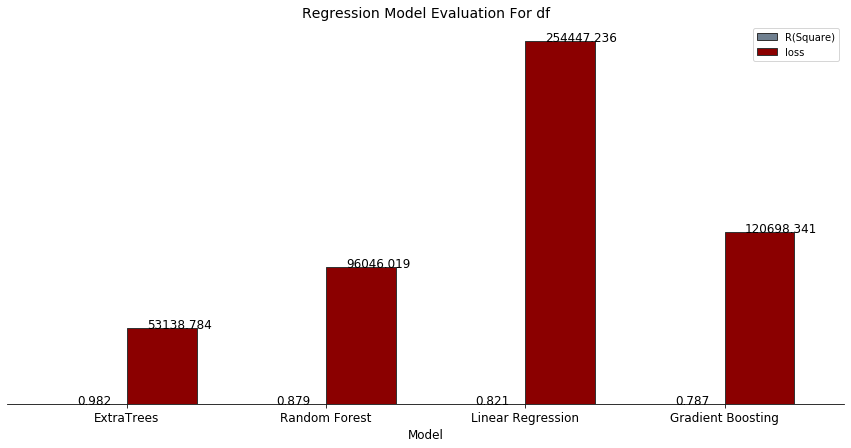

In [61]:
robust_model('df')

In [65]:
sem2['logAdRatio'] = np.log(sem2['AdRatio'])
df_sem2 = sem2[['Revenue', 'Conversion','AdRatio','logAdRatio','Spend']]
#sem_log = np.log(df_sem)
reg_result_sem2_logAdRatio = sm.ols(formula = 'Spend ~ logAdRatio',data = df_sem2).fit()
#reg_result_paid.params
#reg_result_sem2_logAdRatio.summary()

In [16]:
spend_adratio = pd.read_html(reg_result_sem2_logAdRatio.summary().tables[1].as_html(),header=0,index_col=0)[0]
adratio_intercept=spend_adratio['coef'].values[0]
adratio_coef=spend_adratio['coef'].values[1] #coefficient

In [13]:
np.log(40),np.log(35),np.log(30),np.log(25),np.log(22)

(3.6888794541139363,
 3.5553480614894135,
 3.4011973816621555,
 3.2188758248682006,
 3.091042453358316)

In [67]:
sem2_visists_spend = sem2[['Visits', 'Orders', 'Revenue', 'Conversion', 'Spend', 'AOV', 'AdRatio']]
sem2_log = np.log(sem2_visists_spend)
reg_result_sem2_visists_spend = sm.ols(formula = 'Visits ~ Spend',data = sem2_visists_spend).fit()
#reg_result_paid.params
#reg_result_sem2_visists_spend.summary()

In [30]:
visits_Spend = pd.read_html(reg_result_sem2_visists_spend.summary().tables[1].as_html(),header=0,index_col=0)[0]
spend_intercept=visits_Spend['coef'].values[0]
spend_coef=visits_Spend['coef'].values[1] #coefficient
#spend_intercept,spend_coef

(1.608e+05)+(1.0571*425850),(1.608e+05)+(1.0571*363800),(1.608e+05)+(1.0571*239700),\
(1.608e+05)+(1.0571*115600),(1.608e+05)+(1.0571*53550)


(160800.0, 1.0571)

In [35]:
visits_40percent=(spend_intercept)+(spend_coef*spend_40percent)
visits_35percent=(spend_intercept)+(spend_coef*spend_35percent)
visits_30percent=(spend_intercept)+(spend_coef*spend_30percent)
visits_25percent=(spend_intercept)+(spend_coef*spend_25percent)
visits_22percent=(spend_intercept)+(spend_coef*spend_22percent)

In [65]:
#Optimised model for Visits (Spend at 22 to 40 margin - Ad Ratio)
np.exp(5.7803)+np.exp(0.5868)*425850,np.exp(5.7803)+np.exp(0.5868)*363800,\
np.exp(5.7803)+np.exp(0.5868)*239700,np.exp(5.7803)+np.exp(0.5868)*115600,np.exp(5.7803)+np.exp(0.5868)*53550

(766097.9210740434,
 654518.0673293034,
 431358.35983982316,
 208198.65235034298,
 96618.79860560289)

In [66]:
orders_sem2 = sem2[['Visits', 'Orders', 'Revenue', 'Conversion', 'Spend', 'AOV', 'AdRatio']]
sem_log_orders = np.log(orders_sem2)
reg_result_orders_sem2 = sm.ols(formula = 'Orders ~ Visits',data = orders_sem2).fit()
#reg_result_paid.params
#reg_result_orders_sem2.summary()